In [1]:
import sys
assert sys.version_info >= (3, 7)

Note that you need python 3.7 to have use datetime.datetime.fromisoformat()

In [2]:
import numpy as np
from functions import split
from functions import pipeline
from functions import load_data
from functions import compute_f1
from functions import corr_matrix
from functions import plot_feature
from functions import print_sample
from functions import convert_date
from functions import convert_type
from functions import print_feature
from functions import remove_missing
from functions import delete_feature
from functions import convert_one_hot
from functions import convert_weather
from functions import feature_output_corr
from functions import normalization_feature

# 0 Load data

In [4]:
header, data = load_data("data/training.csv", limit=10000)

# 1 Data preprocessing

## 1.1 Remove features with mostly missing values

In [5]:
print_feature(header, data, 3)

--------------------------------------------------
(00) Date/Hour (5899)
--------------------------------------------------
2015-04-24 12:00 :          7 ( 0.1%)
2016-08-15 08:00 :          6 ( 0.1%)
2016-08-12 17:00 :          6 ( 0.1%)
2015-10-02 23:00 :          6 ( 0.1%)
--------------------------------------------------
(01) Temperature (°C) (354)
--------------------------------------------------
21,0       :         83 ( 0.8%)
22,0       :         82 ( 0.8%)
21,1       :         80 ( 0.8%)
19,0       :         80 ( 0.8%)
--------------------------------------------------
(02) Drew point (°C) (364)
--------------------------------------------------
16,0       :        101 ( 1.0%)
16,2       :         91 ( 0.9%)
14,7       :         81 ( 0.8%)
13,1       :         81 ( 0.8%)
--------------------------------------------------
(03) Relativite humidity (%) (89)
--------------------------------------------------
73         :        234 ( 2.3%)
75         :        204 ( 2.0%)
79       

 * We can remove the feature without values in over 50% of samples. 

 * We decide to keep Weather as it is discrete and we can easily replace it with a one-hot vector. 

 * We also need to remove Withdrawals that is not available in test data.

In [6]:
header, data = delete_feature(header, data, "Visility indicator")
header, data = delete_feature(header, data, "hmdx")
header, data = delete_feature(header, data, "Wind Chill")

In [7]:
print(data.shape)
print(header)

(10000, 13)
['Date/Hour' 'Temperature (°C)' 'Drew point (°C)'
 'Relativite humidity (%)' 'wind direction (10s deg)' 'Wind speed (km/h)'
 'Visibility (km)' 'Pressure at the station (kPa)' 'Weather'
 'Public Holiday' 'Station Code' 'Withdrawals' 'Volume']


## 1.2 Convert Date to Year, Month, Day, Hour

In the date we can extract several informations : the Year, the Month, the day, and the hour.

From this, we can also deduce a useful information : the day of the week (if it's Monday, Tuesday, etc.).

In [8]:
header, data = convert_date(header, data)

In [9]:
print(data.shape)
print(header)

(10000, 17)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Weather' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Year' 'Month' 'Day' 'Hour' 'Weekday']


### 1.2.1 One Hot encoding for Year and Month

In [10]:
header, data = convert_one_hot(header, data, "Year")
header, data = convert_one_hot(header, data, "Month")
header, data = convert_one_hot(header, data, "Weekday")

In [11]:
print(data.shape)
print(header)

(10000, 31)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Weather' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Year 2015' 'Year 2016' 'Month 10'
 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8' 'Month 9'
 'Weekday 0' 'Weekday 1' 'Weekday 2' 'Weekday 3' 'Weekday 4' 'Weekday 5'
 'Weekday 6']


## 1.3 Convert Weather to binary vector

In [12]:
weather = [
    'Orages', 'Brouillard', 'Bruine', 'Généralement dégagé',
    'Généralement nuageux', 'Pluie', 'Pluie modérée', 'Pluie forte', 'Dégagé',
    'Nuageux', 'Neige'
]

header, data = convert_weather(header, data, weather)

In [13]:
print(data.shape)
print(header)

(10000, 41)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Year 2015' 'Year 2016' 'Month 10'
 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8' 'Month 9'
 'Weekday 0' 'Weekday 1' 'Weekday 2' 'Weekday 3' 'Weekday 4' 'Weekday 5'
 'Weekday 6' 'Orages' 'Brouillard' 'Bruine' 'Généralement dégagé'
 'Généralement nuageux' 'Pluie' 'Pluie modérée' 'Pluie forte' 'Dégagé'
 'Nuageux' 'Neige']


## 1.4 Remove samples with missing values

In [14]:
# samples with at least one missing value
missing = [d for d in data if "" in d]
print(len(missing))

# number of class 1 with missing value
index = np.where(header == "Volume")
print(sum(["1" in d[index] for d in missing]))

18
3


In [15]:
data = remove_missing(data)

In [16]:
print(data.shape)

(9982, 41)


## 1.5 Convert feature type from string to float (

In [17]:
data = convert_type(data)

## 1.5 Normalization of continuous data

The concerned features are : Temperature, Drew point, Relativite humidity, wind direction, Wind speed, and Pressure at the station

In [18]:
normalization_feature(header, data, "Temperature (°C)")
normalization_feature(header, data, "Drew point (°C)")
normalization_feature(header, data, "Relativite humidity (%)")
normalization_feature(header, data, "wind direction (10s deg)")
normalization_feature(header, data, "Wind speed (km/h)")
normalization_feature(header, data, "Pressure at the station (kPa)")

## 1.6 Get x, y (withdrawals) and label (volume)

In [19]:
header, x, y, label = split(header, data)

# 2 Data analysis & visualization

## 2.1 Distribution of the features

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


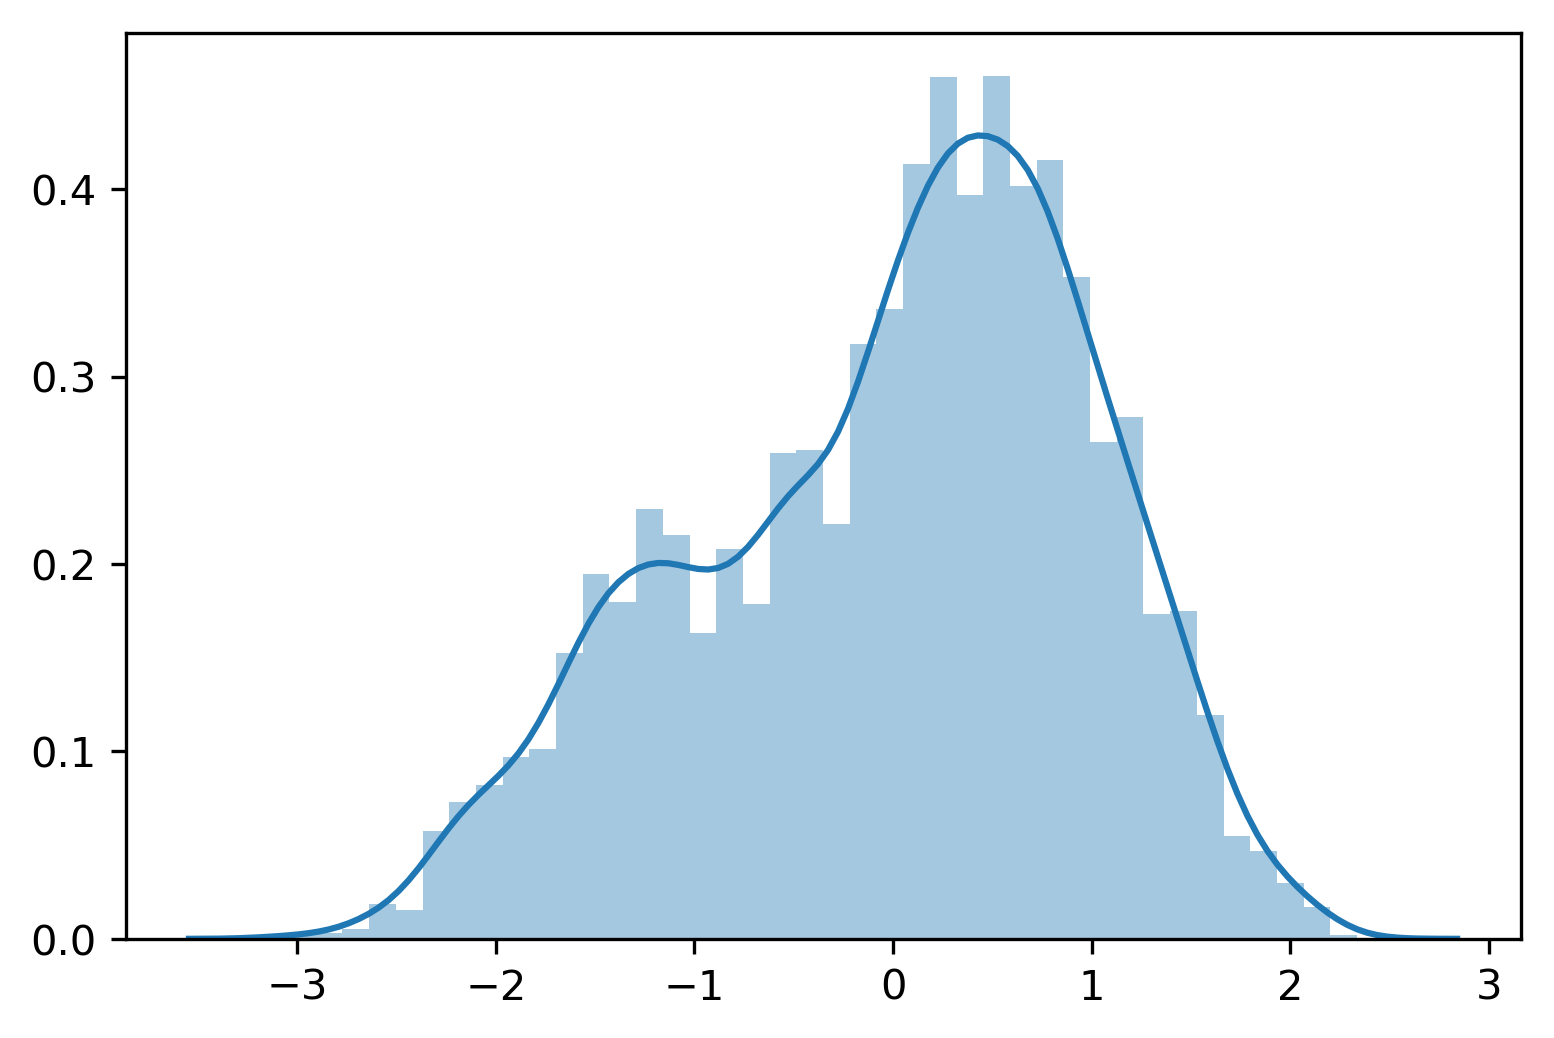

In [20]:
plot_feature(header, x, "Temperature (°C)")

## 2.2 Correlation of features and output

In [21]:
feature_output_corr(header, x, y, 10)

Temperature (°C)               :  0.318
Relativite humidity (%)        : -0.293
Hour                           :  0.291
Visibility (km)                :  0.239
Drew point (°C)                :  0.109
Wind speed (km/h)              :  0.104
Pluie                          : -0.096
Year 2016                      :  0.095
Year 2015                      : -0.095
Month 4                        : -0.087


In [22]:
feature_output_corr(header, x, label, 10)

Temperature (°C)               :  0.190
Relativite humidity (%)        : -0.168
Hour                           :  0.154
Visibility (km)                :  0.151
Drew point (°C)                :  0.069
Wind speed (km/h)              :  0.066
Year 2016                      :  0.064
Year 2015                      : -0.064
Month 7                        :  0.053
Month 4                        : -0.052


### 2.3 Correlation matrix of the features

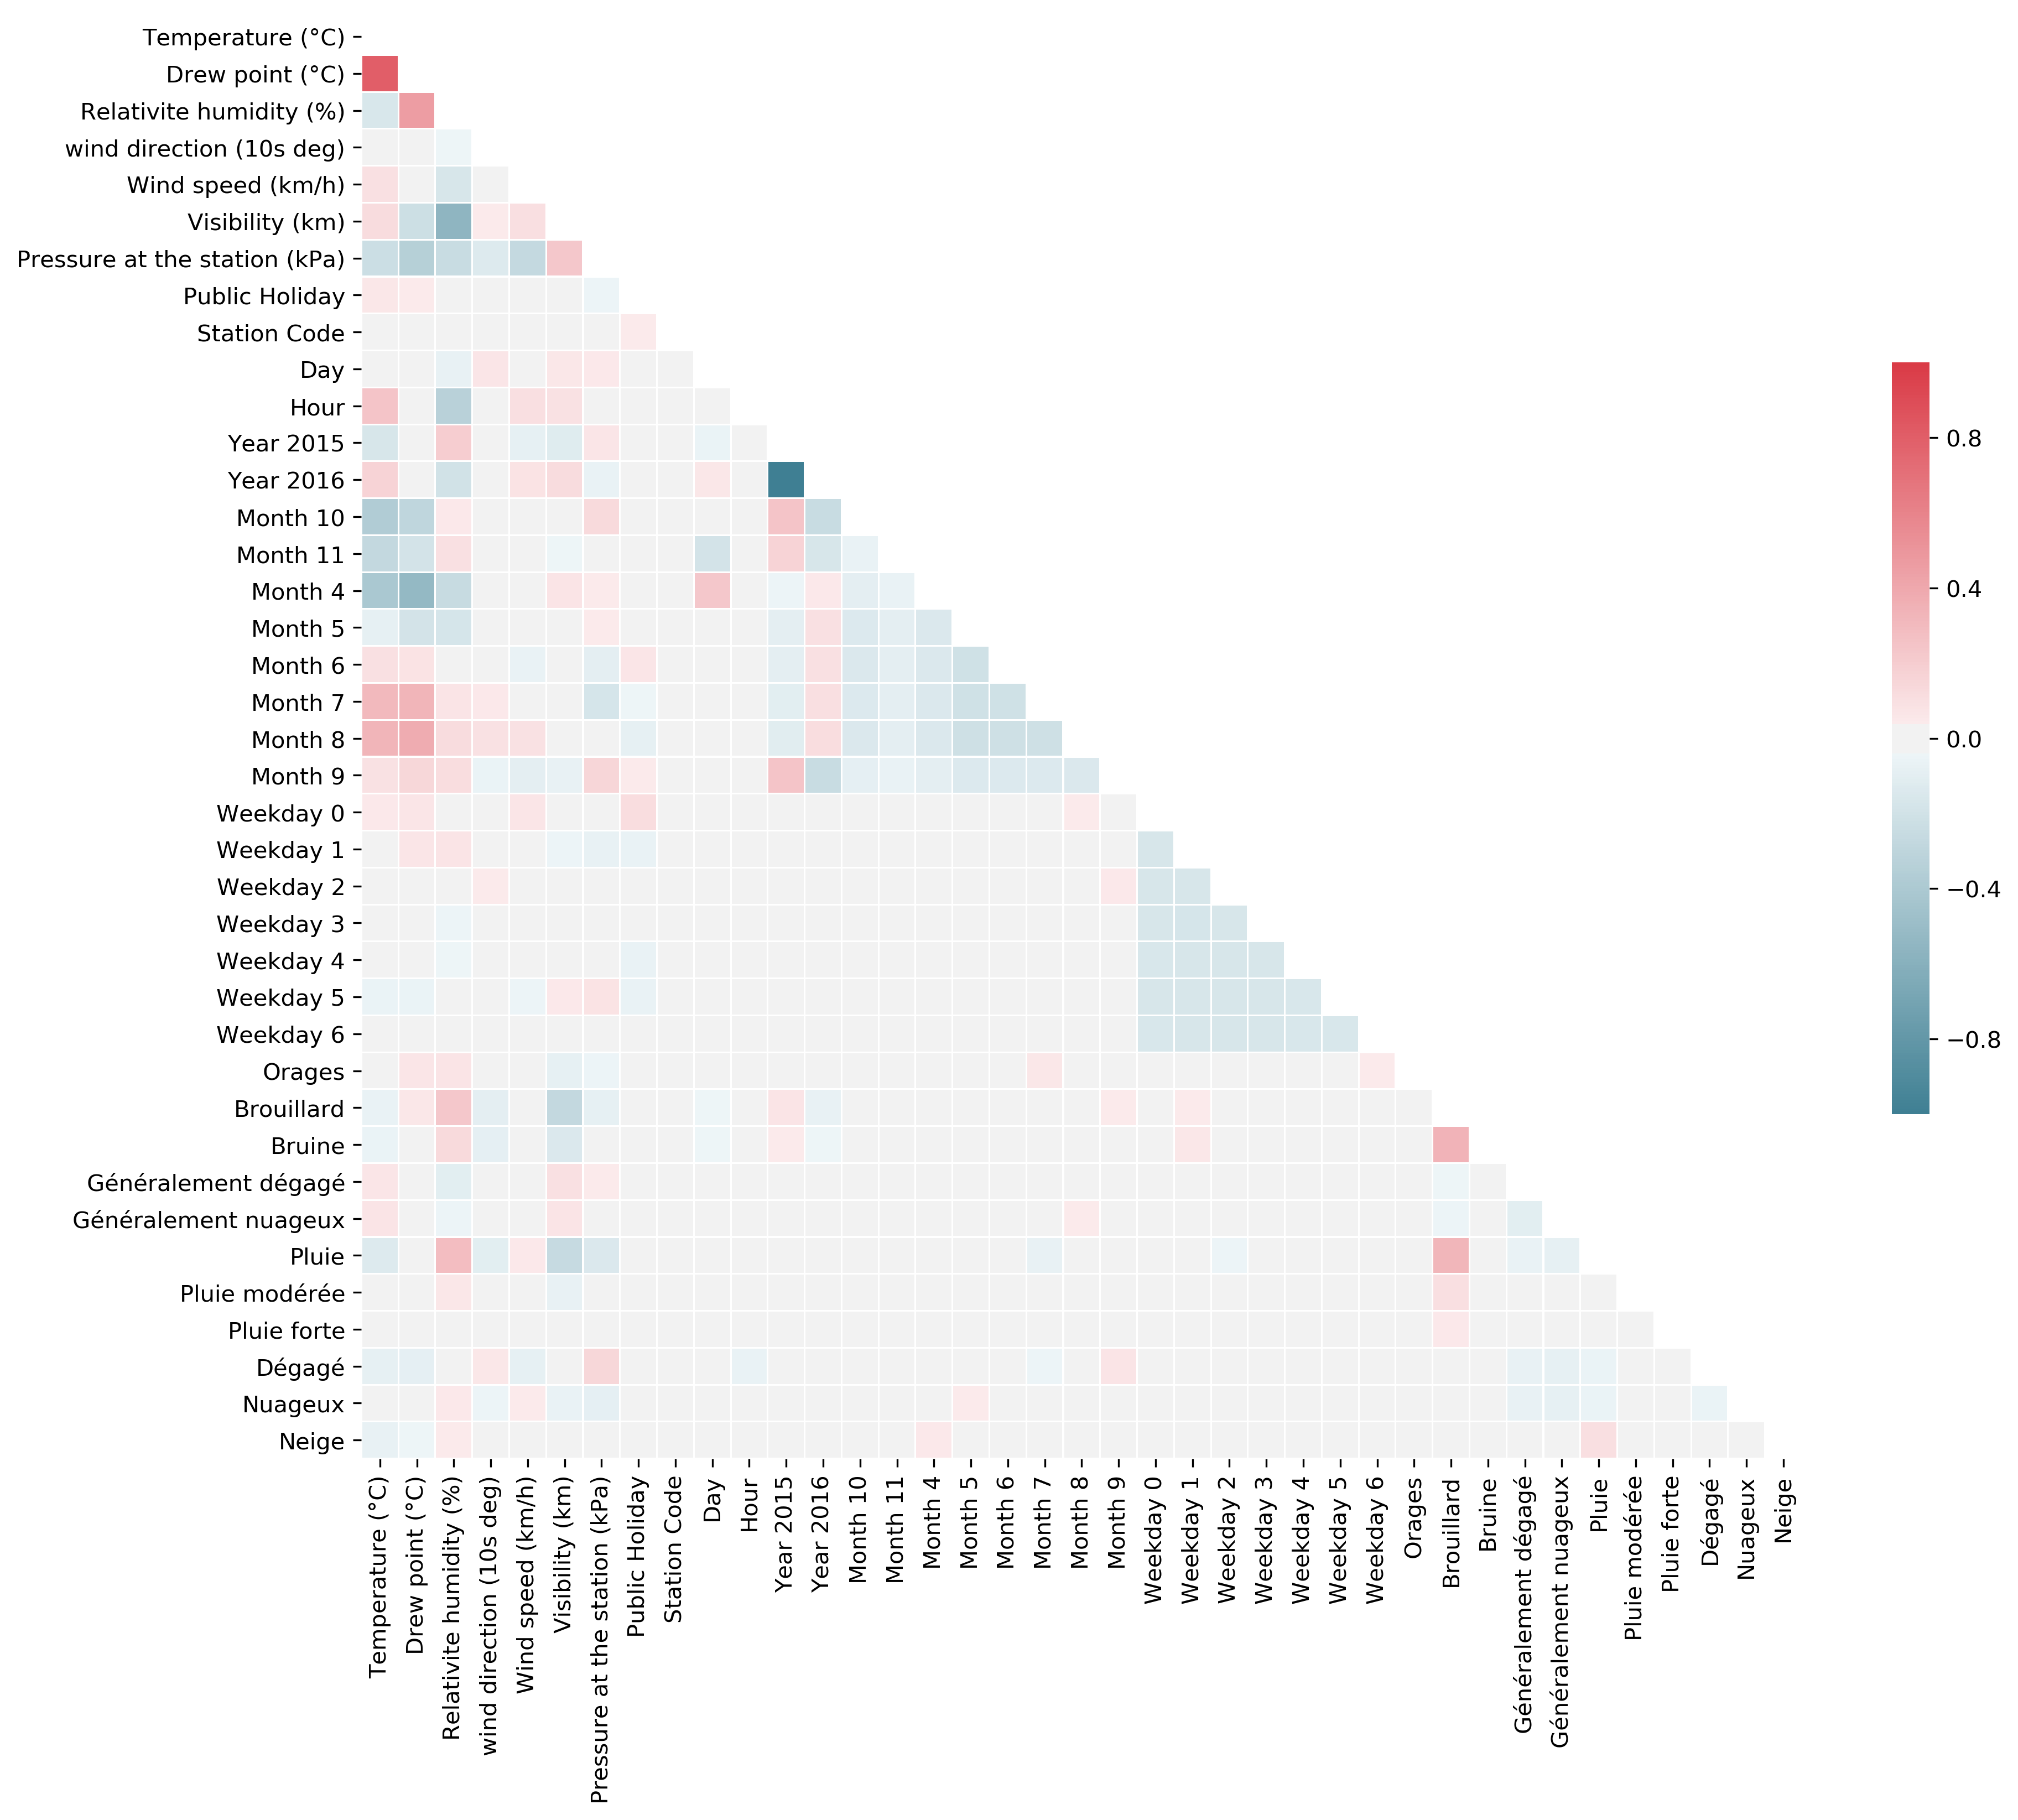

In [23]:
corr_matrix(header, x)

# Models

## Load and split data

* path : (STRING) path of the file to load.
* limit : (INT) limit the number of example to load.
* delete_features : (LIST) feature names to remove.
* cvrt_date : (BOOLEAN) convert the data
* weather : (LIST) weather to consider. All other will be dropped.
* one_hot_features : (LIST) feature names to convert in one-hot vector.
* norm_features : (LIST) feature names to normalize in one-hot vector

In [65]:
header, x, y, label = pipeline(limit=200000)

Data loaded (2.4s)
Visility indicator deleted (0.8s)
hmdx deleted (0.3s)
Wind Chill deleted (0.3s)
Date splited in Year/Month/Day/Hour/Weekday (2.9s)
Year converted in one-hot vector (3.5s)
Month converted in one-hot vector (4.5s)
Weekday converted in one-hot vector (4.9s)
Weather converted (11.6s)
Remove samples with missing values (3.7s)
Data converted to float (13.5s)
Temperature (°C) normalized (0.0s)
Drew point (°C) normalized (0.0s)
Relativite humidity (%) normalized (0.0s)
wind direction (10s deg) normalized (0.0s)
Wind speed (km/h) normalized (0.0s)
Pressure at the station (kPa) normalized (0.0s)
split data into x, y, and label (0.2s)


In [ ]:
# pipeline(path="data/training.csv",
#              limit=200000,
#              delete_features=["Visility indicator", "hmdx", "Wind Chill"],
#              cvrt_date=True,
#              weather=[
#                  "Orages", "Brouillard", "Bruine", "Généralement dégagé",
#                  "Généralement nuageux", "Pluie", "Pluie modérée",
#                  "Pluie forte", "Dégagé", "Nuageux", "Neige"
#              ],
#              one_hot_features=["Year", "Month", "Weekday"],
#              norm_features=[
#                  "Temperature (°C)", "Drew point (°C)",
#                  "Relativite humidity (%)", "wind direction (10s deg)",
#                  "Wind speed (km/h)", "Pressure at the station (kPa)"
#              ])

In [149]:
header, x, y, label = pipeline(path="data/training.csv",
                 limit=200000,
                 delete_features=["Visility indicator", "hmdx", "Wind Chill"],
                 cvrt_date=True,
                 weather=[
                     "Orages", "Brouillard", "Bruine", "Généralement dégagé",
                     "Généralement nuageux", "Pluie", "Pluie modérée",
                     "Pluie forte", "Dégagé", "Nuageux", "Neige"
                 ],
                 one_hot_features=["Weekday"],
                 norm_features=[
                     "Temperature (°C)", "Drew point (°C)",
                     "Relativite humidity (%)", "wind direction (10s deg)",
                     "Wind speed (km/h)", "Pressure at the station (kPa)", "Year", "Month"
                 ])

Data loaded (1.2s)
Visility indicator deleted (0.5s)
hmdx deleted (0.2s)
Wind Chill deleted (0.2s)
Date splited in Year/Month/Day/Hour/Weekday (1.3s)
Weekday converted in one-hot vector (2.0s)
Weather converted (4.8s)
Remove samples with missing values (1.3s)
Data converted to float (4.6s)
Temperature (°C) normalized (0.0s)
Drew point (°C) normalized (0.0s)
Relativite humidity (%) normalized (0.0s)
wind direction (10s deg) normalized (0.0s)
Wind speed (km/h) normalized (0.0s)
Pressure at the station (kPa) normalized (0.0s)
Year normalized (0.0s)
Month normalized (0.0s)
split data into x, y, and label (0.1s)


In [99]:
print(len(header))
print(np.mean(y))
print(np.var(y))

31
2.6673358934177127
14.579836412121411


In [152]:
# y = 1-np.exp(-y)
y = np.sqrt(y)

In [151]:
print(np.quantile(y, 0.99))
print(sorted(y, reverse = True)[0:20])

17.0
[169.0, 156.0, 109.0, 60.0, 59.0, 59.0, 57.0, 57.0, 55.0, 54.0, 52.0, 52.0, 52.0, 51.0, 50.0, 49.0, 49.0, 47.0, 47.0, 46.0]


In [93]:
# non_out_ind = np.where(y < 20)
# x, y, label = x[non_out_ind], y[non_out_ind], label[non_out_ind]

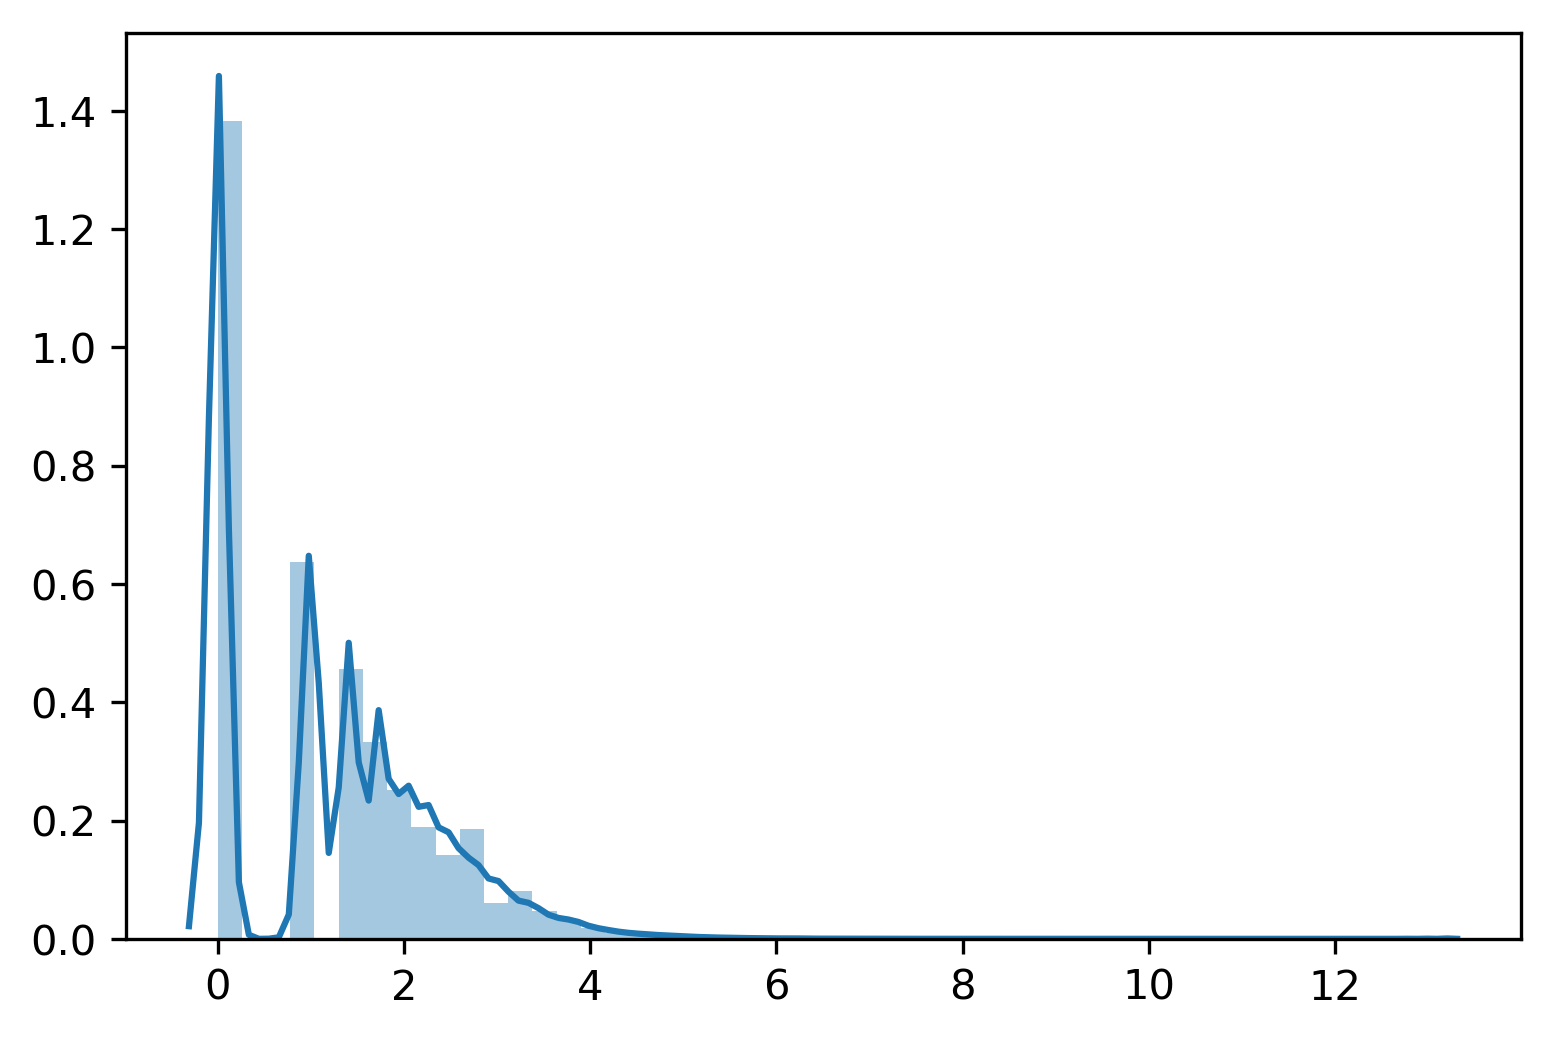

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4), dpi=300)
sns.distplot(y)
plt.show()

In [103]:
split = int(x.shape[0] * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]
label_train, label_test = label[:split], label[split:]

In [104]:
import statsmodels.api as sm
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     2266.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        14:44:08   Log-Likelihood:            -2.1537e+05
No. Observations:              159786   AIC:                         4.308e+05
Df Residuals:                  159755   BIC:                         4.311e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9485      0.037     25.765      0.0

In [122]:
header

array(['Temperature (°C)', 'Drew point (°C)', 'Relativite humidity (%)',
       'wind direction (10s deg)', 'Wind speed (km/h)', 'Visibility (km)',
       'Pressure at the station (kPa)', 'Public Holiday', 'Station Code',
       'Year', 'Month', 'Day', 'Hour', 'Weekday 0', 'Weekday 1',
       'Weekday 2', 'Weekday 3', 'Weekday 4', 'Weekday 5', 'Weekday 6',
       'Orages', 'Brouillard', 'Bruine', 'Généralement dégagé',
       'Généralement nuageux', 'Pluie', 'Pluie modérée', 'Pluie forte',
       'Dégagé', 'Nuageux', 'Neige'], dtype='<U29')

In [132]:
print((x_train[:,[1,2,3]]).shape)

(159786, 3)


In [136]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared


#Initialization variables
Y = y_train
X = x_train
k = len(header)

remaining_features = [i for i in range(len(header))]
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[:,list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [148]:
print('Forward stepwise subset selection')
for i in range(1,15):
    print('Number of features :', i)
    print('Features :', list(header[features_list[i]]))
    print('RSS :', round(RSS_list[i]))
    print('R Squared :', R_squared_list[i])
    print("")

Forward stepwise subset selection
Number of features : 1
Features : ['Temperature (°C)']
RSS : 169387.0
R Squared : 0.14277840925865604

Number of features : 2
Features : ['Temperature (°C)', 'Relativite humidity (%)']
RSS : 151883.0
R Squared : 0.23136062267780713

Number of features : 3
Features : ['Temperature (°C)', 'Relativite humidity (%)', 'Hour']
RSS : 142938.0
R Squared : 0.27663038631977055

Number of features : 4
Features : ['Temperature (°C)', 'Relativite humidity (%)', 'Hour', 'Visibility (km)']
RSS : 140952.0
R Squared : 0.2866807785174015

Number of features : 5
Features : ['Temperature (°C)', 'Relativite humidity (%)', 'Hour', 'Visibility (km)', 'Weekday 6']
RSS : 140375.0
R Squared : 0.2896008879891041

Number of features : 6
Features : ['Temperature (°C)', 'Relativite humidity (%)', 'Hour', 'Visibility (km)', 'Weekday 6', 'Weekday 5']
RSS : 140040.0
R Squared : 0.2912960583980331

Number of features : 7
Features : ['Temperature (°C)', 'Relativite humidity (%)', 'Hour'

In [ ]:
variables = ['R_squared_adj']

plt.plot(df1['numb_features'],df1[v], color = 'lightblue')
ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
ax.set_xlabel('Number of predictors')
ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [30]:
# import numpy as np
# from sklearn.svm import SVR
# import matplotlib.pyplot as plt


# # #############################################################################
# # Fit regression model
# svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# svr_lin = SVR(kernel='linear', C=100, gamma='auto')
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
#                coef0=1)

# # #############################################################################

# svrs = [svr_lin, svr_poly, svr_rbf]

# for svr in svrs:
#     print("-------------------------------------")
#     svr.fit(x_train, y_train)
#     print(svr.score(y_test, x_test))


In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

class Net(nn.Module):
    def __init__(self, input_size = 39, linear_size=100):
        super(Net, self).__init__()
        self.activation = nn.ReLU()
        self.input_size = input_size
        self.linear_size = linear_size

        self.mlp = nn.Sequential(
            nn.Linear(self.input_size, self.linear_size),
            self.activation,
#             nn.Linear(self.linear_size, self.linear_size),
#             self.activation,
#             nn.Linear(self.linear_size, self.linear_size),
#             self.activation,
            nn.Linear(self.linear_size, self.linear_size),
            self.activation,
            nn.Linear(self.linear_size, 1),
            self.activation)
    
    def forward(self, x):
        return self.mlp(x)

    def evaluate(self, loader):
        with torch.no_grad():
            val_loss = 0
            for data in loader:
                # get the inputs
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                ouputs = self(inputs)
                val_loss += criterion(ouputs, labels).item()
        return val_loss / len(loader)

    def predict(self, loader):
        predictions = []
        with torch.no_grad():
            for inputs in loader:
                inputs = inputs.to(device)
                ouputs = self(inputs)
        return outputs.cpu().numpy()

    def train(self,
              trainloader,
              validloader,
              patience=5,
              max_it=9999,
              verbose=True):
        counter, best_val_loss, train_loss, val_loss = 0, -1, None, None
        if verbose:
            print("{:5s} | {:10s} | {:10s}".format(
                "epoch", "train_loss", "valid_loss"))
        for epoch in range(max_it):
            running_loss = 0
            # early stopping
            counter += 1
            if counter > patience - 1:
                break
            for i, data in enumerate(trainloader, 1):
                # get the inputs
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = self.forward(inputs)
                train_loss = criterion(outputs, labels)
                running_loss += train_loss.item()
                train_loss.backward()
                optimizer.step()
            val_loss = self.evaluate(validloader)
            if verbose:
                print(
                    "{:5d} | {:10.5f} | {:10.5f}".format(
                        epoch, running_loss / len(trainloader), val_loss),
                    end="")
            if val_loss > best_val_loss:
                counter = 0
                best_val_loss = val_loss
                torch.save(self.state_dict(), "best_model")
                if verbose:
                    print("\tsaved!", end="")
            if verbose:
                print("")
        self.load_state_dict(torch.load("best_model"))

In [155]:
print(x_train.shape)
print(x_test.shape)

x_train_torch = torch.from_numpy(x_train).float()
y_train_torch = torch.from_numpy(y_train).float()
x_test_torch = torch.from_numpy(x_test).float()
y_test_torch = torch.from_numpy(y_test).float()

train = torch.utils.data.TensorDataset(x_train_torch, y_train_torch)
trainloader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)

valid = torch.utils.data.TensorDataset(x_test_torch, y_test_torch)
validloader = torch.utils.data.DataLoader(valid, batch_size=128, shuffle=False)

(159786, 31)
(39947, 31)


In [157]:
model = Net(input_size = 31, linear_size=100)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# define loss, optimizer and lr decay globally (probably not the best way)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

model.train(trainloader, validloader)

epoch | train_loss | valid_loss
    0 |    2.66949 |    2.66401	saved!
    1 |    2.66682 |    2.66401
    2 |    2.66743 |    2.66401
    3 |    2.66743 |    2.66401
    4 |    2.66720 |    2.66401


## Linear regression on Withdrawals

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [56]:
model_linear = LinearRegression()
model_linear = model_linear.fit(x_train, y_train)

In [57]:
y_pred = model_linear.predict(x_test)

# The coefficients
print('Coefficients: \n', model_linear.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 6.32196148e-01  2.52391168e-01 -6.77582071e-01  4.50921605e-02
  6.84069786e-02  3.12671559e-02  1.80600378e-02 -5.69336506e-01
 -3.39339868e-04 -6.33377329e-04  8.65472916e-02 -4.85230892e-02
  4.85230892e-02  2.27759214e-01  2.64325751e-01 -4.47751568e-01
 -5.90080957e-02  3.94343952e-02  3.16828265e-02 -9.34351317e-02
  3.69926085e-02 -4.76292795e-02  1.15682080e-01  2.15916862e-01
  2.15700129e-01  1.60624366e-01 -2.30401249e-01 -4.29892908e-01
 -1.29772291e-01  3.62676367e-01  6.25318751e-01 -1.65930370e-01
 -1.79711879e-01  2.21480866e-02 -1.99310119e-01 -9.55070153e-01
 -3.32907692e-01 -6.83687527e-02  1.04265057e+00]
Mean squared error: 8.34
Variance score: 0.23


## Logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression

In [23]:
model_logit = LogisticRegression(max_iter=9999, class_weight={0: 1, 1: 6})
model_logit = model_logit.fit(y_train.reshape(-1,1), label_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
prediction = model_logit.predict_proba(y_test.reshape(-1,1))
proba = list(zip(*prediction))[1]

In [34]:
print(model_logit.score(y_test.reshape(-1,1), label_test))
print(model_logit.coef_)

1.0
[ 76.38003793 -24.26294672 -15.11358448 ... -37.98699008 -28.83762784
 -28.83762784]
[[4.57468112]]


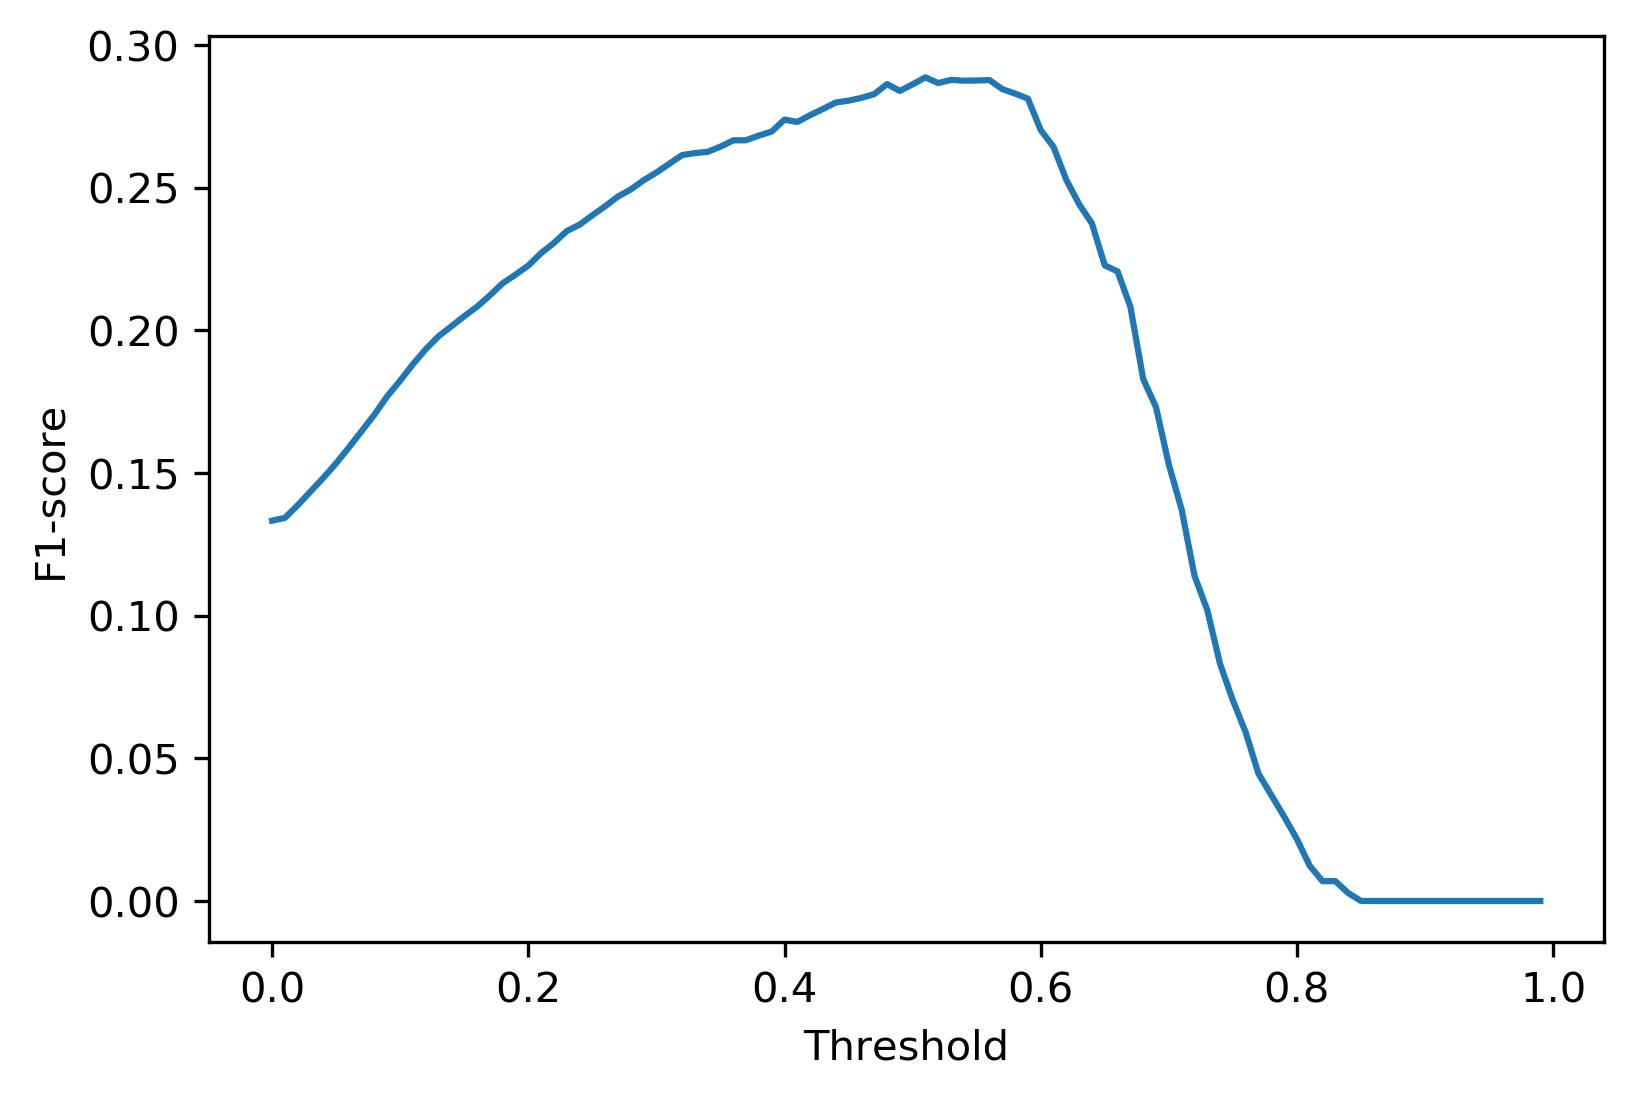

(0.2886459959848316, 0.51)

In [19]:
compute_f1(proba, label_test, plot=True)